In [1]:
import os
import numpy as np
from google.colab import files
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

#IMPORT DATASET

In [2]:
!wget --no-check-certificate \
    "https://github.com/C241-PR567/ML/blob/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip?raw=true" \
    -O "/tmp/Data1.zip"

--2024-06-12 07:10:13--  https://github.com/C241-PR567/ML/blob/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/C241-PR567/ML/raw/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip [following]
--2024-06-12 07:10:13--  https://github.com/C241-PR567/ML/raw/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/C241-PR567/ML/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip [following]
--2024-06-12 07:10:14--  https://raw.githubusercontent.com/C241-PR567/ML/988be70dfe3501a606768081116aab46cd01e68c/%231/new-clean-data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 1

In [3]:
#Extract Zip
local_zip1 = '/tmp/Data1.zip'
zip_ref1   = zipfile.ZipFile(local_zip1, 'r')
zip_ref1.extractall('/tmp')
zip_ref1.close()

In [4]:
source_path1 = '/tmp/Data1.zip'
extract_path = '/tmp/Data'

# Step 1: Extract the contents of the ZIP file
with zipfile.ZipFile(source_path1, 'r') as zip_ref1:
    zip_ref1.extractall(extract_path)


# Step 2: Construct the paths to each category
source_path_Atopic_Dermatitis_Photos = os.path.join(extract_path, 'Atopic_Dermatitis_Photos')
source_path_Acne_and_Rosacea_Photos = os.path.join(extract_path, 'Acne_and_Rosacea_Photos')
source_path_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions = os.path.join(extract_path, 'Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions')
source_path_Light_Diseases_and_Disorders_of_Pigmentation = os.path.join(extract_path, 'Light_Diseases_and_Disorders_of_Pigmentation')
source_path_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections = os.path.join(extract_path, 'Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections')

# Step 3: List the files in each directory and print the counts
print(f"There are {len(os.listdir(source_path_Atopic_Dermatitis_Photos))} images of Atopic_Dermatitis_Photos.")
print(f"There are {len(os.listdir(source_path_Acne_and_Rosacea_Photos))} images of Acne_and_Rosacea_Photos.")
print(f"There are {len(os.listdir(source_path_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions))} images of Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions.")
print(f"There are {len(os.listdir(source_path_Light_Diseases_and_Disorders_of_Pigmentation))} images of Light_Diseases_and_Disorders_of_Pigmentation.")
print(f"There are {len(os.listdir(source_path_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections))} images of Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections.")


There are 22 images of Atopic_Dermatitis_Photos.
There are 802 images of Acne_and_Rosacea_Photos.
There are 322 images of Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions.
There are 299 images of Light_Diseases_and_Disorders_of_Pigmentation.
There are 118 images of Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections.


In [5]:
# Define root directory
root_dir = '/tmp/Data-train-test'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):

  training_path = 'training'
  testing_path = 'testing'
  Atopic_Dermatitis_Photos_path = 'Atopic_Dermatitis_Photos'
  Acne_and_Rosacea_Photos_path = 'Acne_and_Rosacea_Photos'
  Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_path = 'Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions'
  Light_Diseases_and_Disorders_of_Pigmentation_path = 'Light_Diseases_and_Disorders_of_Pigmentation'
  Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_path = 'Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections'
  path_arr = [testing_path, training_path]
  path_arr2 = [Atopic_Dermatitis_Photos_path, Acne_and_Rosacea_Photos_path, Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_path,Light_Diseases_and_Disorders_of_Pigmentation_path,Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_path]

  try:
    for path1 in path_arr:
      path_first = os.path.join(root_path, path1)
      if os.path.isdir(path_first):
        break
      os.makedirs(path_first)
      for path2 in path_arr2:
        path_second = os.path.join(path_first, path2)
        if os.path.isdir(path_second):
          break
        os.makedirs(path_second)
  except OSError:
    pass

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

#Splitting data

In [6]:
#Split data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  list_file = []
  for filename in os.listdir(SOURCE):
    path = SOURCE + filename
    if os.path.getsize(path) > 0:
      list_file.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))

  number_of_files = len(list_file)
  split = int(number_of_files * SPLIT_SIZE)

  shuffle = random.sample(list_file, number_of_files)
  train_file = shuffle[:split]
  test_file = shuffle[split:]

  for filename in train_file:
    copyfile(SOURCE + filename, TRAINING + filename)
  for filename in test_file:
    copyfile(SOURCE + filename, TESTING + filename)


In [7]:
# Test your split_data function

Atopic_Dermatitis_Photos_SOURCE_DIR = "/tmp/Data/Atopic_Dermatitis_Photos/"
Acne_and_Rosacea_Photos_SOURCE_DIR = "/tmp/Data/Acne_and_Rosacea_Photos/"
Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_SOURCE_DIR = "/tmp/Data/Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions/"
Light_Diseases_and_Disorders_of_Pigmentation_SOURCE_DIR = "/tmp/Data/Light_Diseases_and_Disorders_of_Pigmentation/"
Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_SOURCE_DIR = "/tmp/Data/Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections/"

TRAINING_DIR = "/tmp/Data-train-test/training/"
TESTING_DIR = "/tmp/Data-train-test/testing/"

TRAINING_Atopic_Dermatitis_Photos_DIR = os.path.join(TRAINING_DIR, "Atopic_Dermatitis_Photos/")
TESTING_Atopic_Dermatitis_Photos_DIR = os.path.join(TESTING_DIR, "Atopic_Dermatitis_Photos/")

TRAINING_Acne_and_Rosacea_Photos_DIR = os.path.join(TRAINING_DIR, "Acne_and_Rosacea_Photos/")
TESTING_Acne_and_Rosacea_Photos_DIR = os.path.join(TESTING_DIR, "Acne_and_Rosacea_Photos/")

TRAINING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR = os.path.join(TRAINING_DIR, "Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions/")
TESTING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR = os.path.join(TESTING_DIR, "Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions/")

TRAINING_Light_Diseases_and_Disorders_of_Pigmentation_DIR = os.path.join(TRAINING_DIR, "Light_Diseases_and_Disorders_of_Pigmentation/")
TESTING_Light_Diseases_and_Disorders_of_Pigmentation_DIR = os.path.join(TESTING_DIR, "Light_Diseases_and_Disorders_of_Pigmentation/")

TRAINING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR = os.path.join(TRAINING_DIR, "Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections/")
TESTING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR = os.path.join(TESTING_DIR, "Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections/")



In [8]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_Atopic_Dermatitis_Photos_DIR)) > 0:
  for file in os.scandir(TRAINING_Atopic_Dermatitis_Photos_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Acne_and_Rosacea_Photos_DIR)) > 0:
  for file in os.scandir(TRAINING_Acne_and_Rosacea_Photos_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR)) > 0:
  for file in os.scandir(TRAINING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Light_Diseases_and_Disorders_of_Pigmentation_DIR)) > 0:
  for file in os.scandir(TRAINING_Light_Diseases_and_Disorders_of_Pigmentation_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR)) > 0:
  for file in os.scandir(TRAINING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_Atopic_Dermatitis_Photos_DIR)) > 0:
  for file in os.scandir(TESTING_Atopic_Dermatitis_Photos_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_Acne_and_Rosacea_Photos_DIR)) > 0:
  for file in os.scandir(TESTING_Acne_and_Rosacea_Photos_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR)) > 0:
  for file in os.scandir(TESTING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_Light_Diseases_and_Disorders_of_Pigmentation_DIR)) > 0:
  for file in os.scandir(TESTING_Light_Diseases_and_Disorders_of_Pigmentation_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR)) > 0:
  for file in os.scandir(TESTING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(Atopic_Dermatitis_Photos_SOURCE_DIR, TRAINING_Atopic_Dermatitis_Photos_DIR, TESTING_Atopic_Dermatitis_Photos_DIR, split_size)
split_data(Acne_and_Rosacea_Photos_SOURCE_DIR, TRAINING_Acne_and_Rosacea_Photos_DIR, TESTING_Acne_and_Rosacea_Photos_DIR, split_size)
split_data(Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_SOURCE_DIR, TRAINING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR, TESTING_Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions_DIR, split_size)
split_data(Light_Diseases_and_Disorders_of_Pigmentation_SOURCE_DIR, TRAINING_Light_Diseases_and_Disorders_of_Pigmentation_DIR, TESTING_Light_Diseases_and_Disorders_of_Pigmentation_DIR, split_size)
split_data(Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_SOURCE_DIR, TRAINING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR, TESTING_Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_DIR, split_size)


#Augmentasi


In [9]:
#train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=11,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

  return train_generator, validation_generator


In [10]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 1248 images belonging to 5 classes.
Found 315 images belonging to 5 classes.


In [11]:
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)
  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(2048, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.5)(x)

  # Add a final sigmoid layer for classification
  x = layers.Dense(5, activation='softmax')(x)
  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

#Transfer Learning

In [29]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-12 07:40:52--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  22.8MB/s    in 4.8s    

2024-06-12 07:40:57 (17.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [14]:
def create_pre_trained_model(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable

  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [15]:
pre_trained_model = create_pre_trained_model(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [16]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [17]:
#output_of_last_layer
def output_of_last_layer(pre_trained_model):

  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [18]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [19]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


#Callback


In [20]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.8 and logs.get('accuracy')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

#Training

In [21]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 88,150,949 total parameters in this model.
There are 79,175,685 trainable parameters in this model.


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [23]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 500,
                    verbose = 1, callbacks = [callbacks])

Epoch 1/500
63/63 [==============================] - 24s 250ms/step - loss: 1.4825 - accuracy: 0.4647 - val_loss: 0.9671 - val_accuracy: 0.6349
Epoch 2/500
63/63 [==============================] - 12s 187ms/step - loss: 1.2873 - accuracy: 0.5136 - val_loss: 0.9273 - val_accuracy: 0.6698
Epoch 3/500
63/63 [==============================] - 9s 146ms/step - loss: 1.2061 - accuracy: 0.5537 - val_loss: 0.9915 - val_accuracy: 0.6127
Epoch 4/500
63/63 [==============================] - 10s 164ms/step - loss: 1.1501 - accuracy: 0.5697 - val_loss: 0.9715 - val_accuracy: 0.6381
Epoch 5/500
63/63 [==============================] - 10s 162ms/step - loss: 1.0640 - accuracy: 0.6066 - val_loss: 0.8519 - val_accuracy: 0.6889
Epoch 6/500
63/63 [==============================] - 10s 165ms/step - loss: 1.0332 - accuracy: 0.6098 - val_loss: 0.8858 - val_accuracy: 0.6730
Epoch 7/500
63/63 [==============================] - 9s 145ms/step - loss: 1.0483 - accuracy: 0.6050 - val_loss: 0.9296 - val_accuracy: 0

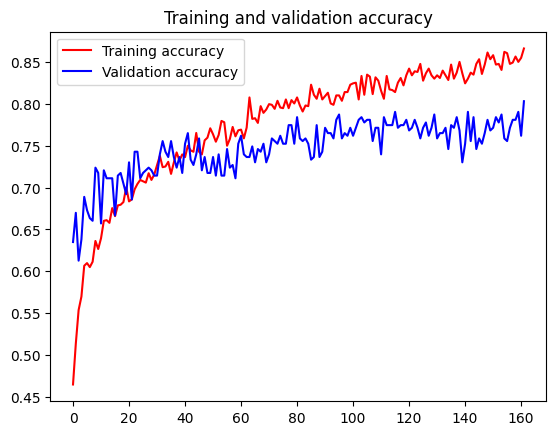

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

#Testing

In [30]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print("Atopic_Dermatitis")
  print(classes[0][0])
  print("Acne_and_Rosacea")
  print(classes[0][1])
  print("Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions")
  print(classes[0][2])
  print("Bullous_Disease")
  print(classes[0][3])
  print("Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections")
  print(classes[0][4])

Saving atopic.jpg to atopic.jpg
1/1 [==============================] - 0s 41ms/step
[9.8878855e-01 2.6392208e-03 1.1842008e-07 8.5454741e-03 2.6766440e-05]
Atopic_Dermatitis
0.98878855
Acne_and_Rosacea
0.0026392208
Actinic_Keratosis_Basal_Cell_Carcinoma_and_other_Malignant_Lesions
1.1842008e-07
Bullous_Disease
0.008545474
Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections
2.676644e-05


# Menghitung skor F1


In [26]:
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = validation_generator.classes

f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'F1 Score: {f1}')

29/29 [==============================] - 1s 18ms/step
F1 Score: 0.38805041207769597


#Save and convert to JSON

In [27]:
if __name__ == '__main__':
    model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
import tensorflow as tf

def convert_h5_to_json(h5_file_path, json_file_path):
    # Memuat model dari file .h5
    model = tf.keras.models.load_model(h5_file_path)

    # Mengekspor arsitektur model ke format JSON
    model_json = model.to_json()

    # Menyimpan JSON ke file
    with open(json_file_path, "w") as json_file:
        json_file.write(model_json)
    print(f"Model berhasil dikonversi dan disimpan ke {json_file_path}")

# Contoh penggunaan
if __name__ == "__main__":
    h5_file_path = "model1.h5"  # Nama file model .h5 yang akan dikonversi
    json_file_path = "model1.json"  # Nama file JSON yang akan disimpan
    convert_h5_to_json(h5_file_path, json_file_path)


Model berhasil dikonversi dan disimpan ke model1.json
